## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Handling Imbalance Dataset
## --> 4. Feature Extraction (Segmented PCA)
## --> 5. Data Cleaning (Removing 0 class) 
## --> 6. Normalization (Z Score Normalization)
## --> 7. Train Test Splitting (70% Train , 30% Test)
## --> 8. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 9. Find Training Accuracy
## --> 10. Testing Accuracy

# 1. Load Dataset

### Import Library

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [164]:
#import the package
from spectral import *

In [165]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [166]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [167]:
data.shape

(145, 145, 220)

In [168]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [169]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [170]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [171]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [172]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [173]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [174]:
ground_truth_data.shape

(145, 145)

In [175]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [176]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [177]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [178]:
df = pd.DataFrame(dictionary)

In [179]:
df.head()

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0    3172    4142    4506    4279    4782    5048    5213    5106    5053   
1    3348    4266    4502    4426    4853    5249    5352    5353    5347   
2    3687    4266    4421    4498    5019    5293    5438    5427    5383   
3    3517    4258    4603    4493    4958    5234    5417    5355    5349   
4    3514    4018    4675    4417    4886    5117    5215    5096    5098   

   band_10  ...  band_211  band_212  band_213  band_214  band_215  band_216  \
0     4750  ...      1094      1090      1112      1090      1062      1069   
1     5065  ...      1108      1104      1117      1091      1079      1085   
2     5132  ...      1111      1114      1114      1100      1065      1092   
3     5096  ...      1122      1108      1109      1109      1071      1088   
4     4834  ...      1110      1107      1112      1094      1072      1087   

   band_217  band_218  band_219  band_220  
0      1057      1020      1020      1005  
1      1064      1029      1020      1000  
2      1061      1030      1016      1009  
3      1060      1030      1006      1005  
4      1052      1034      1019      1019  

[5 rows x 220 columns]

In [180]:
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [181]:
target.shape


(21025,)

In [182]:
df['target'] = target
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Handling Imbalance Dataset

In [183]:
df['target'].value_counts()

0     10659
11     2468
2      1434
14     1294
10      968
3       834
6       747
12      614
5       497
8       489
15      380
4       234
13      212
16       95
1        54
7        26
9        20
Name: target, dtype: int64

from here it is clear that class no 16 , 1 , 7 and 9 have less number of samples.

In [184]:
total = df['target'].value_counts().sum() - df['target'].value_counts()[0]
total

10366

In [185]:
# total number of extra data
num_of_data_to_be_added = 20000
num_of_data_to_be_added


20000

### functions to generate synthetic samples

In [186]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def generate_synthetic_samples(original_samples, num_samples_to_generate, k_neighbors=5):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k_neighbors)
    nn_model.fit(original_samples)

    synthetic_samples = []

    while len(synthetic_samples) < num_samples_to_generate:
        # Choose a random sample from the minority class
        random_sample_idx = np.random.randint(0, len(original_samples))
        random_sample = original_samples[random_sample_idx]

        # Find the k nearest neighbors of the random sample
        _, neighbors_idx = nn_model.kneighbors(
            [random_sample], n_neighbors=k_neighbors)
        neighbors = original_samples[neighbors_idx[0]]

        # Calculate the mean feature values of neighbors
        mean_features = np.mean(neighbors, axis=0)

        # Create a synthetic sample using feature interpolation
        synthetic_sample = random_sample + \
            np.random.uniform(-0.5, 0.5) * (mean_features - random_sample)
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [187]:
names = []
st = 'band_'
for i in range(220):
    names.append(st+str(i+1))

for i in range(1,17):
    original_samples_class_i = df[df['target'] == i].drop('target', axis=1)
    num_samples_to_generate_class_i = int( len(original_samples_class_i) * num_of_data_to_be_added / total)
    synthetic_samples_class_i = generate_synthetic_samples(original_samples_class_i.values, num_samples_to_generate_class_i)
    synthetic_samples_class_i = pd.DataFrame(data=synthetic_samples_class_i, columns=names)
    synthetic_samples_class_i['target'] = i
    df = df.append(synthetic_samples_class_i, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12252\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12252\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12252\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12252\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sy

### Final df

In [188]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  4069.102977  5104.090130  5276.803323  5073.865776  5730.402554   
41014  3656.579773  5181.748480  5181.976174  5417.961898  5960.864232   
41015  3855.799564  5170.674365  5478.734505  5380.343428  6075.481500   
41016  3867.994401  4912.142893  5182.691563  5345.457183  5793.203078   
41017  3845.402560  4776.302899  5105.526132  5177.439272  5712.758887   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6253.924621  6478.001824  6403.580872  6554.665451  6222.924621  ...   
41014  6392.355407  6700.215347  6698.293961  6660.422109  6388.722726  ...   
41015  6731.958552  7026.237392  6957.663672  7040.226699  6719.718465  ...   
41016  6393.122916  6696.779997  6546.934469  6618.114390  6423.257157  ...   
41017  6179.226513  6369.991959  6297.203237  6320.156686  6103.391240  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1081.266545  1082.194853  1059.246322  1053.389706  1053.220588   
41014  1095.371130  1099.429729  1076.039066  1064.429729  1068.390663   
41015  1089.974165  1081.431627  1067.741648  1050.793319  1057.806236   
41016  1089.377147  1091.502863  1068.880010  1056.968571  1065.528566   
41017  1068.066547  1077.164727  1053.427634  1042.835273  1045.184723   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1041.584559  1015.318014  1002.466910   997.077204      16  
41014  1040.980467  1030.585994  1015.918057  1008.707003      16  
41015  1041.064588  1030.348775  1015.503785  1014.051670      16  
41016  1044.214277  1020.722865   998.602876  1013.717140      16  
41017  1036.494181  1025.321096  1001.866906  1007.956729      16  

[41018 rows x 221 columns]

In [189]:
df['target'].value_counts()


0     10659
11     7229
2      4200
14     3790
10     2835
3      2443
6      2188
12     1798
5      1455
8      1432
15     1113
4       685
13      621
16      278
1       158
7        76
9        58
Name: target, dtype: int64

In [190]:
# df = df.sample(frac=1, random_state=np.random.seed())
# df


In [191]:
target = df['target']
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [192]:
df = df.drop('target',axis=1)
df

band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  4069.102977  5104.090130  5276.803323  5073.865776  5730.402554   
41014  3656.579773  5181.748480  5181.976174  5417.961898  5960.864232   
41015  3855.799564  5170.674365  5478.734505  5380.343428  6075.481500   
41016  3867.994401  4912.142893  5182.691563  5345.457183  5793.203078   
41017  3845.402560  4776.302899  5105.526132  5177.439272  5712.758887   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6253.924621  6478.001824  6403.580872  6554.665451  6222.924621  ...   
41014  6392.355407  6700.215347  6698.293961  6660.422109  6388.722726  ...   
41015  6731.958552  7026.237392  6957.663672  7040.226699  6719.718465  ...   
41016  6393.122916  6696.779997  6546.934469  6618.114390  6423.257157  ...   
41017  6179.226513  6369.991959  6297.203237  6320.156686  6103.391240  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1089.045957  1081.266545  1082.194853  1059.246322  1053.389706   
41014  1096.175798  1095.371130  1099.429729  1076.039066  1064.429729   
41015  1081.315369  1089.974165  1081.431627  1067.741648  1050.793319   
41016  1094.220003  1089.377147  1091.502863  1068.880010  1056.968571   
41017  1070.890182  1068.066547  1077.164727  1053.427634  1042.835273   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1053.220588  1041.584559  1015.318014  1002.466910   997.077204  
41014  1068.390663  1040.980467  1030.585994  1015.918057  1008.707003  
41015  1057.806236  1041.064588  1030.348775  1015.503785  1014.051670  
41016  1065.528566  1044.214277  1020.722865   998.602876  1013.717140  
41017  1045.184723  1036.494181  1025.321096  1001.866906  1007.956729  

[41018 rows x 220 columns]

# 4. Feature Extraction (Segmented PCA)

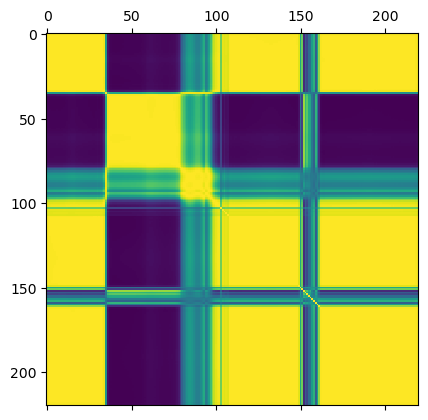

In [193]:
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

plt.matshow(corr_matrix.corr())
plt.show()

In [194]:
df1 = df.iloc[:,:36] #100
df1

band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  4069.102977  5104.090130  5276.803323  5073.865776  5730.402554   
41014  3656.579773  5181.748480  5181.976174  5417.961898  5960.864232   
41015  3855.799564  5170.674365  5478.734505  5380.343428  6075.481500   
41016  3867.994401  4912.142893  5182.691563  5345.457183  5793.203078   
41017  3845.402560  4776.302899  5105.526132  5177.439272  5712.758887   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6253.924621  6478.001824  6403.580872  6554.665451  6222.924621  ...   
41014  6392.355407  6700.215347  6698.293961  6660.422109  6388.722726  ...   
41015  6731.958552  7026.237392  6957.663672  7040.226699  6719.718465  ...   
41016  6393.122916  6696.779997  6546.934469  6618.114390  6423.257157  ...   
41017  6179.226513  6369.991959  6297.203237  6320.156686  6103.391240  ...   

           band_27      band_28      band_29      band_30      band_31  \
0      4207.000000  4305.000000  4311.000000  3991.000000  4168.000000   
1      4698.000000  4794.000000  4806.000000  4452.000000  4628.000000   
2      4862.000000  4965.000000  4992.000000  4595.000000  4756.000000   
3      4720.000000  4848.000000  4847.000000  4484.000000  4613.000000   
4      4297.000000  4408.000000  4401.000000  4102.000000  4227.000000   
...            ...          ...          ...          ...          ...   
41013  5443.066180  5565.748166  5535.625005  5078.476109  5132.917285   
41014  5735.752725  5859.951867  5823.326806  5341.221520  5463.862304   
41015  6058.301553  6246.587963  6214.613799  5680.515805  5804.239189   
41016  5969.017051  6108.765620  6077.419901  5568.017051  5664.751368   
41017  5184.833792  5306.634151  5267.880343  4829.233072  4863.206517   

           band_32      band_33      band_34      band_35      band_36  
0      3942.000000  4061.000000  4365.000000  4318.000000  4252.000000  
1      4433.000000  4643.000000  4967.000000  4853.000000  4760.000000  
2      4529.000000  4801.000000  5077.000000  4983.000000  4868.000000  
3      4402.000000  4674.000000  4966.000000  4848.000000  4776.000000  
4      4075.000000  4264.000000  4529.000000  4490.000000  4438.000000  
...            ...          ...          ...          ...          ...  
41013  4949.005512  5113.974265  5252.360284  5004.590071  4787.064356  
41014  5452.730829  5686.868043  5887.789910  5588.508826  5253.840889  
41015  5586.993755  5707.384405  5978.840968  5608.792420  5286.001326  
41016  5474.611401  5660.391399  5827.660008  5528.308563  5173.177122  
41017  4744.900338  4912.614155  4984.451227  4777.484342  4467.426153  

[41018 rows x 36 columns]

In [195]:
df2 = df.iloc[:,36:102] #100:170
df2

band_37      band_38      band_39      band_40      band_41  \
0      4869.000000  5284.000000  5055.000000  3591.000000  5175.000000   
1      5449.000000  5768.000000  5684.000000  3987.000000  5773.000000   
2      5515.000000  5972.000000  5913.000000  4027.000000  5846.000000   
3      5473.000000  5894.000000  5789.000000  4086.000000  5785.000000   
4      5001.000000  5378.000000  5321.000000  3779.000000  5357.000000   
...            ...          ...          ...          ...          ...   
41013  5168.409929  5421.031246  5235.329038  3653.452199  5154.202189   
41014  5855.790392  6098.254895  5864.434504  4145.235362  5885.020498   
41015  5771.211130  6023.550109  5840.402669  4095.849437  5848.893537   
41016  5716.968571  6015.245706  5779.588624  4070.499937  5804.471434   
41017  4948.435992  5157.437791  4971.619234  3491.845429  4908.792319   

           band_42      band_43      band_44      band_45      band_46  ...  \
0      5217.000000  5058.000000  4969.000000  4721.000000  4291.000000  ...   
1      5789.000000  5607.000000  5585.000000  5165.000000  4720.000000  ...   
2      6005.000000  5828.000000  5729.000000  5282.000000  4823.000000  ...   
3      5938.000000  5694.000000  5563.000000  5148.000000  4735.000000  ...   
4      5496.000000  5278.000000  5169.000000  4883.000000  4459.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  5358.757365  5062.338237  5014.455886  4606.954043  4303.654427  ...   
41014  6028.345423  5720.993344  5721.474534  5169.289669  4703.375422  ...   
41015  5829.883742  5652.506010  5562.790196  5120.889089  4719.325164  ...   
41016  5810.685837  5620.471434  5514.688637  5099.862959  4700.662807  ...   
41017  4970.058506  4836.392721  4701.703978  4391.768726  4003.386161  ...   

           band_93      band_94      band_95      band_96      band_97  \
0      2740.000000  2947.000000  2706.000000  2834.000000  2856.000000   
1      2951.000000  3133.000000  2842.000000  3028.000000  3038.000000   
2      2989.000000  3141.000000  2883.000000  3091.000000  3119.000000   
3      2978.000000  3128.000000  2908.000000  3075.000000  3065.000000   
4      2828.000000  3004.000000  2770.000000  2954.000000  2927.000000   
...            ...          ...          ...          ...          ...   
41013  2472.045957  2628.968754  2398.060668  2554.536778  2576.408105   
41014  2760.222967  2937.805151  2679.629353  2839.039548  2852.641265   
41015  2705.708242  2875.547885  2566.351897  2738.333633  2737.966594   
41016  2777.457056  2921.877084  2625.131442  2790.837129  2795.448531   
41017  2377.505819  2473.459268  2276.792002  2398.906898  2404.737093   

           band_98      band_99     band_100     band_101     band_102  
0      2683.000000  2400.000000  2229.000000  1822.000000  1542.000000  
1      2842.000000  2550.000000  2359.000000  1916.000000  1615.000000  
2      2907.000000  2610.000000  2388.000000  1939.000000  1613.000000  
3      2880.000000  2573.000000  2382.000000  1900.000000  1594.000000  
4      2782.000000  2490.000000  2312.000000  1864.000000  1572.000000  
...            ...          ...          ...          ...          ...  
41013  2436.654427  2187.865815  2038.691185  1702.430152  1446.876839  
41014  2649.008103  2399.402575  2214.285377  1819.211054  1532.707003  
41015  2568.256127  2346.057017  2156.876171  1765.804012  1499.217375  
41016  2644.059932  2378.679985  2213.002800  1820.428553  1526.571447  
41017  2260.820355  2057.236352  1915.600719  1629.470906  1405.216356  

[41018 rows x 66 columns]

In [196]:
df3 = df.iloc[:,102:] #170:
df3

band_103     band_104     band_105     band_106     band_107  \
0      1097.000000  1029.000000  1020.000000  1026.000000  1009.000000   
1      1118.000000  1014.000000  1020.000000  1031.000000  1016.000000   
2      1093.000000  1032.000000  1052.000000  1018.000000  1016.000000   
3      1093.000000  1030.000000  1015.000000  1034.000000  1018.000000   
4      1094.000000  1024.000000  1030.000000  1029.000000  1025.000000   
...            ...          ...          ...          ...          ...   
41013  1073.194853  1037.676474  1021.123161  1032.974265  1017.590071   
41014  1092.039066  1027.023343  1022.726536  1017.121009  1033.449262   
41015  1112.072159  1023.689978  1031.322939  1038.348775  1033.361692   
41016  1086.722865  1032.465708  1022.377147  1013.765746  1024.534292   
41017  1082.179645  1024.074905  1022.494181  1023.098180  1022.780364   

          band_108     band_109     band_110     band_111     band_112  ...  \
0      1011.000000  1047.000000  1069.000000  1100.000000  1122.000000  ...   
1      1021.000000  1036.000000  1071.000000  1110.000000  1128.000000  ...   
2      1009.000000  1039.000000  1076.000000  1106.000000  1143.000000  ...   
3      1018.000000  1030.000000  1071.000000  1112.000000  1135.000000  ...   
4      1023.000000  1047.000000  1074.000000  1112.000000  1125.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  1036.481621  1045.240810  1078.604782  1111.066180  1113.487133  ...   
41014  1017.218675  1050.312530  1070.273464  1102.867078  1138.097666  ...   
41015  1022.625390  1059.891313  1070.025835  1112.025835  1127.470379  ...   
41016  1031.339992  1047.277135  1059.822878  1123.485685  1143.931416  ...   
41017  1019.800360  1037.329454  1062.549090  1090.219636  1112.176365  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1089.045957  1081.266545  1082.194853  1059.246322  1053.389706   
41014  1096.175798  1095.371130  1099.429729  1076.039066  1064.429729   
41015  1081.315369  1089.974165  1081.431627  1067.741648  1050.793319   
41016  1094.220003  1089.377147  1091.502863  1068.880010  1056.968571   
41017  1070.890182  1068.066547  1077.164727  1053.427634  1042.835273   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1053.220588  1041.584559  1015.318014  1002.466910   997.077204  
41014  1068.390663  1040.980467  1030.585994  1015.918057  1008.707003  
41015  1057.806236  1041.064588  1030.348775  1015.503785  1014.051670  
41016  1065.528566  1044.214277  1020.722865   998.602876  1013.717140  
41017  1045.184723  1036.494181  1025.321096  1001.866906  1007.956729  

[41018 rows x 118 columns]

In [197]:
from sklearn.decomposition import PCA

In [198]:
# df1
pca = PCA(n_components=36)
pca.fit(df1)
x1_pca = pca.transform(df1)
df1 = pd.DataFrame(x1_pca)
df1

0           1            2           3           4   \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

               5           6           7           8          9   ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              26         27         28         29         30         31  \
0      -3.976863 -22.572411  18.456306  23.673229  13.076044  -1.634717   
1     -21.286513   7.239087 -13.555736  14.189724   2.584773  -5.221960   
2      -2.598910 -12.619606  -4.688338 -25.440551 -18.537536   4.739435   
3       2.148599 -19.590327 -10.897706 -24.782140 -14.970654  -5.438054   
4      -8.702225 -10.468276  21.928032 -42.667874 -26.040528  -6.772443   
...          ...        ...        ...        ...        ...        ...   
41013  19.995994  27.089443  25.743541  -5.046573  49.259122 -13.027055   
41014   7.217720 -17.290926   1.916084   1.008869  17.380754 -19.451025   
41015 -15.086234  17.121489  24.540339  -7.473542  -1.015110  23.894439   
41016  18.816415  11.547290  -6.380331  -7.809282   7.229645  12.406990   
41017 -14.184694   0.574699 -10.900560 -12.682153   7.118573 -11.219339   

              32         33         34         35  
0       4.204832   7.768871  -9.710523  -2.928396  
1       8.906061   2.750014   5.608823  -8.240058  
2      18.718797  18.830431  -1.639482  -8.352052  
3     -17.987231   5.193270 -10.711794  -9.034364  
4     -38.737714  -1.145148 -17.571198 -19.215405  
...          ...        ...        ...        ...  
41013   8.591388   9.865012  -4.019519 -17.888816  
41014   4.159399   5.644520  -5.319085   5.568646  
41015  -1.248475  21.276230 -14.688395   9.914572  
41016  26.451628  -5.966734  20.931900  13.158722  
41017 -20.042412   8.922773 -18.486374 -14.499605  

[41018 rows x 36 columns]

In [199]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.97802035, 0.98873869, 0.99467069, 0.99616334, 0.99694078,
       0.99754996, 0.9980396 , 0.99838598, 0.99865284, 0.99882311,
       0.99895878, 0.99908135, 0.99918201, 0.99926693, 0.99934357,
       0.99941415, 0.99948001, 0.99954297, 0.99960004, 0.99965136,
       0.99969848, 0.99973896, 0.99977291, 0.9998037 , 0.99983017,
       0.99985178, 0.9998729 , 0.99989059, 0.99990771, 0.99992378,
       0.99993823, 0.99995227, 0.99996535, 0.99997757, 0.99998924,
       1.        ])

In [200]:
df1 = df1.iloc[:,:13]
df1

0           1            2           3           4   \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

               5           6           7           8          9           10  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845    7.387099   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100   50.623869   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681   54.125220   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459   70.666246   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192   86.165966   
...           ...         ...         ...         ...        ...         ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  -26.312266   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280   56.984067   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074 -148.336211   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  -33.569865   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235   45.200232   

               11         12  
0      -10.252911 -16.284215  
1      -34.613513  59.715826  
2      -18.141408  55.373182  
3      -47.752447  20.840030  
4       22.770063 -10.271603  
...           ...        ...  
41013  -91.039970  17.361974  
41014 -103.922823  48.373173  
41015  -43.102854  -3.889040  
41016  -53.207083 -49.319637  
41017  -22.073415  14.453812  

[41018 rows x 13 columns]

In [201]:
# df2
pca = PCA(n_components=66)
pca.fit(df2)
x2_pca = pca.transform(df2)
df2 = pd.DataFrame(x2_pca)
df2

0            1            2           3           4   \
0      3716.310625  -208.459563   105.694029  -75.425963  -26.806929   
1      1154.287572   328.034062   371.989140  -70.520746  -55.192851   
2       392.242475   538.828293   403.416262  -38.428996   -7.300484   
3       858.603877   408.733354   426.777909  -53.405070    1.452324   
4      2722.911854    53.598621   133.280202   33.958919    0.558546   
...            ...          ...          ...         ...         ...   
41013  4713.547508 -1840.053787  1058.696708 -260.561023 -177.985256   
41014  1554.461288  -820.775939  1355.235503 -224.706777 -147.987788   
41015  1826.365240  -888.463240  1176.557141 -387.945083 -114.312115   
41016  1943.226829  -811.525604  1217.671565 -253.635796 -168.347597   
41017  6159.041907 -2331.562000  1095.413958 -300.570960 -170.941728   

               5           6          7          8          9   ...  \
0       10.126913  -97.904187   6.834949 -62.334078  10.594947  ...   
1       26.581979  -59.707001  37.236294   4.210801 -36.720109  ...   
2      104.120396  -12.534270  53.270592 -11.445594 -38.851926  ...   
3       67.118207   -0.305567   3.732550  19.722569  29.806948  ...   
4       65.603610  -41.048044  67.013430 -33.565185  28.936343  ...   
...           ...         ...        ...        ...        ...  ...   
41013   96.069479  126.358304  -4.858356  65.654118  -2.535682  ...   
41014   16.918163   35.893627   3.479852  75.713250  67.270483  ...   
41015  119.936347 -111.589872 -44.036366  25.281398 -22.647007  ...   
41016   26.325797  -26.327778 -19.818437  13.281189  -3.961528  ...   
41017   65.205824    3.528202  -2.863603 -34.245147   8.639705  ...   

              56         57         58         59         60         61  \
0       2.914555  -4.624551 -28.591120  -1.278052   2.721880   7.147473   
1       9.712839  14.085633  -4.118395 -25.870943  -2.353690  12.993493   
2      16.125945   1.324094   2.288699 -23.886258 -13.691620 -11.886890   
3      -4.860643  28.144843  15.216112  -9.197329  11.837113  -6.879115   
4       7.449825  24.247257  -1.543660  11.484911   9.037797   0.748010   
...          ...        ...        ...        ...        ...        ...   
41013  14.162430  -4.369767  11.443391 -13.396640  -6.580008 -19.278233   
41014  19.198480   0.201569   1.898061 -20.334813 -17.183902  14.952884   
41015   0.060582 -17.876250  -7.981056  14.210954  -6.558632   3.938650   
41016   9.610229  14.474969  -2.077647  -9.808494  24.206564  -1.506289   
41017  -1.277315 -26.515773  -2.273041  29.874492  -8.099762   1.477324   

              62         63         64         65  
0     -10.070045  17.724580   4.610856  -3.200103  
1      -0.362533  19.191770   0.097682   4.882533  
2      -5.028806  -7.656684   1.882207  -6.725369  
3       6.248029   3.506532  24.007291   1.425530  
4     -16.546768   2.418099  21.277510  -1.419313  
...          ...        ...        ...        ...  
41013 -14.795993   4.394014   6.862985 -13.962400  
41014  -0.141071   6.271600   1.894440  -9.167567  
41015  11.867189 -17.574201   9.645432  -9.055504  
41016   9.948313   4.418004  10.692181 -17.754603  
41017  -4.867403   9.234954  -9.500789  -8.638489  

[41018 rows x 66 columns]

In [202]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.92910462, 0.98888934, 0.99635446, 0.99720283, 0.99751497,
       0.99774079, 0.99793068, 0.99806224, 0.99817165, 0.99827784,
       0.99837767, 0.99847345, 0.99856748, 0.9986573 , 0.99874371,
       0.99882149, 0.99889679, 0.99896528, 0.99902559, 0.99907902,
       0.9991266 , 0.99916998, 0.99921089, 0.99924616, 0.99927964,
       0.99930947, 0.99933645, 0.99936286, 0.99938885, 0.99941416,
       0.99943851, 0.99946151, 0.9994842 , 0.99950642, 0.99952837,
       0.99954996, 0.99957056, 0.99959088, 0.99961076, 0.99962983,
       0.99964864, 0.99966704, 0.99968492, 0.99970226, 0.99971933,
       0.99973628, 0.99975301, 0.99976959, 0.99978562, 0.9998012 ,
       0.99981653, 0.99983156, 0.99984649, 0.99986127, 0.99987543,
       0.99988917, 0.99990246, 0.99991541, 0.99992818, 0.99994061,
       0.99995237, 0.99996383, 0.99997509, 0.99998462, 0.9999932 ,
       1.        ])

In [203]:
df2 = df2.iloc[:,:20]
df2

0            1            2           3           4   \
0      3716.310625  -208.459563   105.694029  -75.425963  -26.806929   
1      1154.287572   328.034062   371.989140  -70.520746  -55.192851   
2       392.242475   538.828293   403.416262  -38.428996   -7.300484   
3       858.603877   408.733354   426.777909  -53.405070    1.452324   
4      2722.911854    53.598621   133.280202   33.958919    0.558546   
...            ...          ...          ...         ...         ...   
41013  4713.547508 -1840.053787  1058.696708 -260.561023 -177.985256   
41014  1554.461288  -820.775939  1355.235503 -224.706777 -147.987788   
41015  1826.365240  -888.463240  1176.557141 -387.945083 -114.312115   
41016  1943.226829  -811.525604  1217.671565 -253.635796 -168.347597   
41017  6159.041907 -2331.562000  1095.413958 -300.570960 -170.941728   

               5           6          7          8          9          10  \
0       10.126913  -97.904187   6.834949 -62.334078  10.594947   5.880195   
1       26.581979  -59.707001  37.236294   4.210801 -36.720109  39.143145   
2      104.120396  -12.534270  53.270592 -11.445594 -38.851926  -8.041565   
3       67.118207   -0.305567   3.732550  19.722569  29.806948 -64.432304   
4       65.603610  -41.048044  67.013430 -33.565185  28.936343 -28.180847   
...           ...         ...        ...        ...        ...        ...   
41013   96.069479  126.358304  -4.858356  65.654118  -2.535682 -50.934333   
41014   16.918163   35.893627   3.479852  75.713250  67.270483  58.392877   
41015  119.936347 -111.589872 -44.036366  25.281398 -22.647007 -28.071942   
41016   26.325797  -26.327778 -19.818437  13.281189  -3.961528 -21.599818   
41017   65.205824    3.528202  -2.863603 -34.245147   8.639705 -15.252695   

              11          12         13         14         15         16  \
0      18.537256   -3.997912  -1.893588 -70.045288  11.303670 -28.722132   
1      32.626299   21.097996  -3.781585  56.764456 -35.297862  -7.012151   
2      42.366164  116.723273  34.781809 -39.705683 -32.636553   2.647956   
3      32.957211   19.789132  35.138657  34.853614  -6.965969  53.214432   
4      37.223296    2.246701  25.107619  22.559859   7.081078  42.285689   
...          ...         ...        ...        ...        ...        ...   
41013 -52.145458  -15.948033 -66.670247 -40.850855 -97.079798  15.852486   
41014  -2.180895   23.373329  82.294161  52.187300 -83.514788  -1.010680   
41015   4.876462    3.084926 -32.033115  71.364266 -36.002313   2.790902   
41016  -6.135036    3.076267   1.604145  36.677375  22.245841 -30.370196   
41017 -26.547184   49.213952  15.510097  18.640021  -1.913747  31.258918   

              17         18         19  
0      32.589926  22.262877  19.637935  
1      -4.395076   9.922334   6.923092  
2       5.776487 -42.965810  24.985330  
3      85.109315   6.882512  42.530656  
4      -9.209684   9.877165  37.217173  
...          ...        ...        ...  
41013   4.730262 -39.729688  92.994295  
41014 -23.046830   7.305882  10.175804  
41015 -43.759086   8.505628 -18.004992  
41016  39.591976  25.356120  -5.173066  
41017   2.589796  10.016639  48.591443  

[41018 rows x 20 columns]

In [204]:
# df3
pca = PCA(n_components=118)
pca.fit(df3)
x3_pca = pca.transform(df3)
df3 = pd.DataFrame(x3_pca)
df3

0           1           2          3          4          5    \
0       844.174592  209.406998   16.496507 -21.657230 -15.479480  12.040750   
1      1298.422284  158.854582   17.236668 -30.990330  -0.157309  16.469471   
2      1498.257821  139.794733   27.275288 -33.436750 -18.234133  -8.778162   
3      1396.383154  138.150051   21.281337 -32.932183 -30.592417   1.477059   
4      1061.807995  164.845083   16.879152 -18.870114   3.040865   3.617716   
...            ...         ...         ...        ...        ...        ...   
41013   -64.794468  314.186178 -197.314543 -11.946459  11.908856 -19.158039   
41014   624.646112  221.878227 -143.757111   3.522233  23.935429 -19.899070   
41015   534.473407  192.780645 -204.948281  -9.546227 -17.510563   6.237963   
41016   870.021572  208.002578 -168.151058 -21.131238  -8.707734 -27.746777   
41017  -558.740577  371.247515 -175.332768  -2.548863  -4.810373  -7.030737   

             6          7          8          9    ...       108        109  \
0       2.242688   5.195751   2.342473 -17.621703  ...  0.609220  -0.555625   
1       9.214279   5.422527   3.936547 -25.802933  ... -8.126239   0.239762   
2      12.773237  18.649895  10.315972  -1.645476  ...  0.695350  -6.600357   
3      -4.700789   5.329508  -2.917540 -10.265661  ...  1.148757   0.203729   
4      13.390891   7.435859  -7.219162  -8.883919  ...  4.856379   6.435815   
...          ...        ...        ...        ...  ...       ...        ...   
41013 -42.129361 -12.043559  21.679320 -12.341993  ...  6.867727   7.318735   
41014 -10.883248 -25.280125  32.268231 -33.640660  ...  0.777063  12.994254   
41015  -4.706756 -43.786790  41.643403 -18.167281  ...  3.564334   6.890011   
41016 -16.131145 -48.533347  53.447915 -19.782779  ...  3.851784   1.413213   
41017   6.324762 -11.120021  25.060142 -13.310734  ... -3.856056   0.485922   

             110        111       112       113        114       115  \
0       3.917531  -4.489808  1.317358 -6.182435  -6.687769  2.847404   
1      -1.411644   1.498042 -6.950721 -2.837979 -11.074656 -3.816967   
2     -10.708289   5.024631 -9.363446 -0.272305  -2.879722  1.599909   
3      -6.492457   1.268720 -9.859901  2.437205  -1.826558  3.371503   
4      -5.303961  -1.269864 -3.286249 -5.285894  -2.731522 -3.672138   
...          ...        ...       ...       ...        ...       ...   
41013   6.820375  11.573272 -6.348342  1.789594   2.468342  4.230644   
41014  -6.016928  -0.407802  5.753710 -0.851405  -3.277546  4.951750   
41015   1.470682 -11.782230  3.987411 -4.578465  -3.476475 -1.519707   
41016   0.569041   4.435783  0.968500 -3.101727   7.614011 -0.067568   
41017  -4.782004   0.392184  0.853264 -0.730525  -0.098801  0.811808   

            116       117  
0     -4.459019  5.248974  
1      0.011983  4.911909  
2     -1.357642  6.631796  
3     -2.907499 -3.307539  
4      0.143033 -8.342737  
...         ...       ...  
41013  4.942928  4.583860  
41014  0.190043 -4.659128  
41015 -3.205196 -7.787530  
41016  1.170358 -3.066837  
41017  0.975642  0.249804  

[41018 rows x 118 columns]

In [205]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.9927361 , 0.9975844 , 0.99820194, 0.99835411, 0.99842501,
       0.99847942, 0.99853237, 0.99857862, 0.99862025, 0.998661  ,
       0.99869702, 0.99873105, 0.99876441, 0.99879548, 0.99882537,
       0.9988538 , 0.99888047, 0.99890428, 0.9989277 , 0.99894989,
       0.99897156, 0.99899286, 0.99901344, 0.99903225, 0.99905058,
       0.99906836, 0.99908519, 0.99910144, 0.99911741, 0.99913274,
       0.99914803, 0.99916272, 0.99917713, 0.99919149, 0.9992057 ,
       0.99921971, 0.99923356, 0.99924725, 0.99926075, 0.99927415,
       0.99928744, 0.9993007 , 0.99931387, 0.99932699, 0.99933983,
       0.99935257, 0.99936506, 0.99937741, 0.99938964, 0.99940171,
       0.99941376, 0.99942567, 0.99943744, 0.99944915, 0.99946075,
       0.99947225, 0.9994837 , 0.99949498, 0.99950624, 0.99951739,
       0.99952847, 0.9995395 , 0.99955048, 0.99956128, 0.99957197,
       0.99958256, 0.99959305, 0.99960346, 0.99961381, 0.999624  ,
       0.99963413, 0.99964418, 0.99965416, 0.99966397, 0.99967

In [206]:
df3 = df3.iloc[:,:27]
df3

0           1           2          3          4          5   \
0       844.174592  209.406998   16.496507 -21.657230 -15.479480  12.040750   
1      1298.422284  158.854582   17.236668 -30.990330  -0.157309  16.469471   
2      1498.257821  139.794733   27.275288 -33.436750 -18.234133  -8.778162   
3      1396.383154  138.150051   21.281337 -32.932183 -30.592417   1.477059   
4      1061.807995  164.845083   16.879152 -18.870114   3.040865   3.617716   
...            ...         ...         ...        ...        ...        ...   
41013   -64.794468  314.186178 -197.314543 -11.946459  11.908856 -19.158039   
41014   624.646112  221.878227 -143.757111   3.522233  23.935429 -19.899070   
41015   534.473407  192.780645 -204.948281  -9.546227 -17.510563   6.237963   
41016   870.021572  208.002578 -168.151058 -21.131238  -8.707734 -27.746777   
41017  -558.740577  371.247515 -175.332768  -2.548863  -4.810373  -7.030737   

              6          7          8          9   ...         17         18  \
0       2.242688   5.195751   2.342473 -17.621703  ...  -4.316389  -2.728167   
1       9.214279   5.422527   3.936547 -25.802933  ...   2.340834  -6.420214   
2      12.773237  18.649895  10.315972  -1.645476  ...   6.177277  10.875342   
3      -4.700789   5.329508  -2.917540 -10.265661  ...   9.555235   4.206829   
4      13.390891   7.435859  -7.219162  -8.883919  ...   3.462077   3.765209   
...          ...        ...        ...        ...  ...        ...        ...   
41013 -42.129361 -12.043559  21.679320 -12.341993  ...  15.615768  -9.066746   
41014 -10.883248 -25.280125  32.268231 -33.640660  ...  22.728621  19.753809   
41015  -4.706756 -43.786790  41.643403 -18.167281  ...  37.320363  17.067598   
41016 -16.131145 -48.533347  53.447915 -19.782779  ...  23.653355   7.717863   
41017   6.324762 -11.120021  25.060142 -13.310734  ...   9.962515   5.184026   

              19         20         21         22         23         24  \
0      17.596798 -10.381914   5.792291  16.214036   5.104183  -1.551849   
1      10.886500  -9.404361   1.342134  -1.725240   1.052467   3.039647   
2      10.998892 -10.040462  -8.550397   2.687653  12.893784  -4.925499   
3      15.470729   5.476766  -1.861796  -3.555225   3.631788  -1.491970   
4      12.992791   3.958397   1.242682   8.327347  -3.118787   4.827992   
...          ...        ...        ...        ...        ...        ...   
41013  -8.514896   7.471360   4.852054   0.498644  -4.228016  15.127199   
41014 -15.557959   2.164892  14.896234   0.764600   3.692664  13.985258   
41015  -7.698146 -10.244205   2.956709   7.958365 -14.082922  19.259539   
41016 -10.390864   6.656645  14.124027  -4.616212 -12.739020  -2.289451   
41017   2.681106  -2.220577   5.843748  -5.007780  -0.288702  12.913158   

              25         26  
0     -13.006216  -2.430075  
1     -12.553657   0.619067  
2      -4.841876  -5.498454  
3       1.284325   5.818031  
4      -7.228482   6.105681  
...          ...        ...  
41013  -5.253268 -17.028144  
41014  -4.208888  -3.842747  
41015   3.653070 -15.862218  
41016  -2.217795  -2.713075  
41017  -3.198433 -10.181221  

[41018 rows x 27 columns]

In [207]:
df = pd.concat([df1, df2, df3], axis=1)
df

0           1            2           3           4   \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

               5           6           7           8          9   ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              17         18         19         20         21         22  \
0      -4.316389  -2.728167  17.596798 -10.381914   5.792291  16.214036   
1       2.340834  -6.420214  10.886500  -9.404361   1.342134  -1.725240   
2       6.177277  10.875342  10.998892 -10.040462  -8.550397   2.687653   
3       9.555235   4.206829  15.470729   5.476766  -1.861796  -3.555225   
4       3.462077   3.765209  12.992791   3.958397   1.242682   8.327347   
...          ...        ...        ...        ...        ...        ...   
41013  15.615768  -9.066746  -8.514896   7.471360   4.852054   0.498644   
41014  22.728621  19.753809 -15.557959   2.164892  14.896234   0.764600   
41015  37.320363  17.067598  -7.698146 -10.244205   2.956709   7.958365   
41016  23.653355   7.717863 -10.390864   6.656645  14.124027  -4.616212   
41017   9.962515   5.184026   2.681106  -2.220577   5.843748  -5.007780   

              23         24         25         26  
0       5.104183  -1.551849 -13.006216  -2.430075  
1       1.052467   3.039647 -12.553657   0.619067  
2      12.893784  -4.925499  -4.841876  -5.498454  
3       3.631788  -1.491970   1.284325   5.818031  
4      -3.118787   4.827992  -7.228482   6.105681  
...          ...        ...        ...        ...  
41013  -4.228016  15.127199  -5.253268 -17.028144  
41014   3.692664  13.985258  -4.208888  -3.842747  
41015 -14.082922  19.259539   3.653070 -15.862218  
41016 -12.739020  -2.289451  -2.217795  -2.713075  
41017  -0.288702  12.913158  -3.198433 -10.181221  

[41018 rows x 60 columns]

In [208]:
df.columns = range(0,60)

In [209]:
df

0           1            2           3           4   \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

               5           6           7           8          9   ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              50         51         52         53         54         55  \
0      -4.316389  -2.728167  17.596798 -10.381914   5.792291  16.214036   
1       2.340834  -6.420214  10.886500  -9.404361   1.342134  -1.725240   
2       6.177277  10.875342  10.998892 -10.040462  -8.550397   2.687653   
3       9.555235   4.206829  15.470729   5.476766  -1.861796  -3.555225   
4       3.462077   3.765209  12.992791   3.958397   1.242682   8.327347   
...          ...        ...        ...        ...        ...        ...   
41013  15.615768  -9.066746  -8.514896   7.471360   4.852054   0.498644   
41014  22.728621  19.753809 -15.557959   2.164892  14.896234   0.764600   
41015  37.320363  17.067598  -7.698146 -10.244205   2.956709   7.958365   
41016  23.653355   7.717863 -10.390864   6.656645  14.124027  -4.616212   
41017   9.962515   5.184026   2.681106  -2.220577   5.843748  -5.007780   

              56         57         58         59  
0       5.104183  -1.551849 -13.006216  -2.430075  
1       1.052467   3.039647 -12.553657   0.619067  
2      12.893784  -4.925499  -4.841876  -5.498454  
3       3.631788  -1.491970   1.284325   5.818031  
4      -3.118787   4.827992  -7.228482   6.105681  
...          ...        ...        ...        ...  
41013  -4.228016  15.127199  -5.253268 -17.028144  
41014   3.692664  13.985258  -4.208888  -3.842747  
41015 -14.082922  19.259539   3.653070 -15.862218  
41016 -12.739020  -2.289451  -2.217795  -2.713075  
41017  -0.288702  12.913158  -3.198433 -10.181221  

[41018 rows x 60 columns]

In [210]:
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [211]:
df['target'] = target
df

0           1            2           3           4  \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

                5           6           7           8          9  ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              51         52         53         54         55         56  \
0      -2.728167  17.596798 -10.381914   5.792291  16.214036   5.104183   
1      -6.420214  10.886500  -9.404361   1.342134  -1.725240   1.052467   
2      10.875342  10.998892 -10.040462  -8.550397   2.687653  12.893784   
3       4.206829  15.470729   5.476766  -1.861796  -3.555225   3.631788   
4       3.765209  12.992791   3.958397   1.242682   8.327347  -3.118787   
...          ...        ...        ...        ...        ...        ...   
41013  -9.066746  -8.514896   7.471360   4.852054   0.498644  -4.228016   
41014  19.753809 -15.557959   2.164892  14.896234   0.764600   3.692664   
41015  17.067598  -7.698146 -10.244205   2.956709   7.958365 -14.082922   
41016   7.717863 -10.390864   6.656645  14.124027  -4.616212 -12.739020   
41017   5.184026   2.681106  -2.220577   5.843748  -5.007780  -0.288702   

              57         58         59  target  
0      -1.551849 -13.006216  -2.430075       3  
1       3.039647 -12.553657   0.619067       3  
2      -4.925499  -4.841876  -5.498454       3  
3      -1.491970   1.284325   5.818031       3  
4       4.827992  -7.228482   6.105681       3  
...          ...        ...        ...     ...  
41013  15.127199  -5.253268 -17.028144      16  
41014  13.985258  -4.208888  -3.842747      16  
41015  19.259539   3.653070 -15.862218      16  
41016  -2.289451  -2.217795  -2.713075      16  
41017  12.913158  -3.198433 -10.181221      16  

[41018 rows x 61 columns]

# 5. Data Cleaning (Removing 0 class) 

In [212]:
df = df[df['target']!=0]

In [213]:
df

0           1            2           3           4  \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

                5           6           7           8          9  ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              51         52         53         54         55         56  \
0      -2.728167  17.596798 -10.381914   5.792291  16.214036   5.104183   
1      -6.420214  10.886500  -9.404361   1.342134  -1.725240   1.052467   
2      10.875342  10.998892 -10.040462  -8.550397   2.687653  12.893784   
3       4.206829  15.470729   5.476766  -1.861796  -3.555225   3.631788   
4       3.765209  12.992791   3.958397   1.242682   8.327347  -3.118787   
...          ...        ...        ...        ...        ...        ...   
41013  -9.066746  -8.514896   7.471360   4.852054   0.498644  -4.228016   
41014  19.753809 -15.557959   2.164892  14.896234   0.764600   3.692664   
41015  17.067598  -7.698146 -10.244205   2.956709   7.958365 -14.082922   
41016   7.717863 -10.390864   6.656645  14.124027  -4.616212 -12.739020   
41017   5.184026   2.681106  -2.220577   5.843748  -5.007780  -0.288702   

              57         58         59  target  
0      -1.551849 -13.006216  -2.430075       3  
1       3.039647 -12.553657   0.619067       3  
2      -4.925499  -4.841876  -5.498454       3  
3      -1.491970   1.284325   5.818031       3  
4       4.827992  -7.228482   6.105681       3  
...          ...        ...        ...     ...  
41013  15.127199  -5.253268 -17.028144      16  
41014  13.985258  -4.208888  -3.842747      16  
41015  19.259539   3.653070 -15.862218      16  
41016  -2.289451  -2.217795  -2.713075      16  
41017  12.913158  -3.198433 -10.181221      16  

[30359 rows x 61 columns]

In [214]:
x = df[df.columns[:-1]]
x

0           1            2           3           4   \
0       2046.767864  488.949724   -34.774157 -253.547322   52.461500   
1       4446.250024  -69.304118   -55.564715 -159.471609   45.666148   
2       5174.071789 -162.090018   -13.787315  131.633160  130.410756   
3       4601.130969  -73.086398    59.849537  -13.346313   91.938799   
4       2619.926290  261.571211    49.832213   66.433436  206.168272   
...             ...         ...          ...         ...         ...   
41013   9064.654761  217.580972  2377.674487  -64.870154   29.153964   
41014  10718.320208 -385.295553  2253.713058 -443.260531 -159.370686   
41015  12233.900090 -228.767003  2654.257768 -411.672925   50.302102   
41016  11219.466409 -181.921296  1928.247936 -249.477414  146.029990   
41017   7860.928232  486.189185  2286.347520 -253.818061  251.513673   

               5           6           7           8          9   ...  \
0      -88.763360   60.627069  -78.776888   30.346988  40.393845  ...   
1      -27.747980  -55.651076  -18.328441   28.139682 -61.323100  ...   
2      -74.694172 -193.081810   32.559242   24.746737  66.868681  ...   
3      -79.403608  -19.229007  -66.038127  -27.694924  33.840459  ...   
4      -81.449113  206.044989  -62.338872  -49.619627  80.953192  ...   
...           ...         ...         ...         ...        ...  ...   
41013 -159.788844 -257.185613 -232.136063   81.900853 -64.797891  ...   
41014  127.896474 -101.227087  202.362253   19.886262  21.405280  ...   
41015 -112.680385  -89.192154  -18.510361  133.713643 -70.162074  ...   
41016 -113.152165 -204.887597   26.602321  -74.281098 -63.162364  ...   
41017  -84.506173 -220.018684  -34.507885  -56.691396  16.128235  ...   

              50         51         52         53         54         55  \
0      -4.316389  -2.728167  17.596798 -10.381914   5.792291  16.214036   
1       2.340834  -6.420214  10.886500  -9.404361   1.342134  -1.725240   
2       6.177277  10.875342  10.998892 -10.040462  -8.550397   2.687653   
3       9.555235   4.206829  15.470729   5.476766  -1.861796  -3.555225   
4       3.462077   3.765209  12.992791   3.958397   1.242682   8.327347   
...          ...        ...        ...        ...        ...        ...   
41013  15.615768  -9.066746  -8.514896   7.471360   4.852054   0.498644   
41014  22.728621  19.753809 -15.557959   2.164892  14.896234   0.764600   
41015  37.320363  17.067598  -7.698146 -10.244205   2.956709   7.958365   
41016  23.653355   7.717863 -10.390864   6.656645  14.124027  -4.616212   
41017   9.962515   5.184026   2.681106  -2.220577   5.843748  -5.007780   

              56         57         58         59  
0       5.104183  -1.551849 -13.006216  -2.430075  
1       1.052467   3.039647 -12.553657   0.619067  
2      12.893784  -4.925499  -4.841876  -5.498454  
3       3.631788  -1.491970   1.284325   5.818031  
4      -3.118787   4.827992  -7.228482   6.105681  
...          ...        ...        ...        ...  
41013  -4.228016  15.127199  -5.253268 -17.028144  
41014   3.692664  13.985258  -4.208888  -3.842747  
41015 -14.082922  19.259539   3.653070 -15.862218  
41016 -12.739020  -2.289451  -2.217795  -2.713075  
41017  -0.288702  12.913158  -3.198433 -10.181221  

[30359 rows x 60 columns]

In [215]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 6. Normalization (Z Score Normalization)

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.29437549,  1.04925284, -0.01313691, ..., -0.2471747 ,
        -1.79991889, -0.30186857],
       [ 0.85938752, -0.19479282, -0.0783609 , ...,  0.38222752,
        -1.73727257,  0.13466291],
       [ 1.03076952, -0.40156237,  0.05270286, ..., -0.70963457,
        -0.66975436, -0.74115405],
       ...,
       [ 2.69316483, -0.55014929,  8.42287418, ...,  2.60565006,
         0.50617488, -2.22488584],
       [ 2.45429361, -0.44575556,  6.1452415 , ..., -0.34828512,
        -0.30651101, -0.34238441],
       [ 1.66345028,  1.0431011 ,  7.26866887, ...,  1.73568823,
        -0.44225772, -1.41156404]])

In [217]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.294375  1.049253 -0.013137 -1.562531  0.468027 -0.814347  0.610318   
1      0.859388 -0.194793 -0.078361 -0.992209  0.410859 -0.231035 -0.628315   
2      1.030770 -0.401562  0.052703  0.772577  1.123804 -0.679844 -2.092272   
3      0.895858 -0.203221  0.283716 -0.106343  0.800144 -0.724867 -0.240335   
4      0.429339  0.542549  0.252290  0.377312  1.761141 -0.744422  2.159357   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.946895  0.444519  7.555179 -0.418700  0.271944 -1.493356 -2.775127   
30355  2.336287 -0.898967  7.166288 -2.712643 -1.314089  1.256939 -1.113805   
30356  2.693165 -0.550149  8.422874 -2.521147  0.449860 -1.042995 -0.985605   
30357  2.454294 -0.445756  6.145241 -1.537858  1.255206 -1.047506 -2.218031   
30358  1.663450  1.043101  7.268669 -1.564172  2.142626 -0.773648 -2.379212   

             7         8         9   ...        50        51        52  \
0     -1.048663  0.395638  0.748794  ... -0.474504 -0.305280  2.184902   
1     -0.273456  0.363897 -1.070378  ...  0.335250 -0.746652  1.355425   
2      0.379141  0.315108  1.222287  ...  0.801897  1.320975  1.369318   
3     -0.885297 -0.438984  0.631589  ...  1.212777  0.523776  1.922093   
4     -0.837857 -0.754254  1.474184  ...  0.471633  0.470982  1.615789   
...         ...       ...       ...  ...       ...       ...       ...   
30354 -3.015380  1.136964 -1.132523  ...  1.949952 -1.063037 -1.042830   
30355  2.556738  0.245216  0.409190  ...  2.815127  2.382367 -1.913440   
30356 -0.275789  1.882013 -1.228460  ...  4.589999  2.061239 -0.941869   
30357  0.302747 -1.108877 -1.103273  ...  2.927607  0.943509 -1.274723   
30358 -0.480945 -0.855943  0.314812  ...  1.262316  0.640597  0.341136   

             53        54        55        56        57        58        59  
0     -1.295798  0.759808  2.113018  0.690589 -0.247175 -1.799919 -0.301869  
1     -1.173097  0.195322 -0.215097  0.149568  0.382228 -1.737273  0.134663  
2     -1.252939 -1.059508  0.357597  1.730724 -0.709635 -0.669754 -0.741154  
3      0.694763 -0.211084 -0.452588  0.493982 -0.238966  0.178277  0.878974  
4      0.504179  0.182707  1.089503 -0.407414  0.627374 -1.000125  0.920156  
...         ...       ...       ...       ...       ...       ...       ...  
30354  0.945122  0.640542  0.073513 -0.555528  2.039189 -0.726702 -2.391806  
30355  0.279061  1.914608  0.108028  0.502110  1.882652 -0.582132 -0.504114  
30356 -1.278513  0.400125  1.041617 -1.871440  2.605650  0.506175 -2.224886  
30357  0.842860  1.816657 -0.590280 -1.691991 -0.348285 -0.306511 -0.342384  
30358 -0.271398  0.766335 -0.641097 -0.029516  1.735688 -0.442258 -1.411564  

[30359 rows x 60 columns]

In [218]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60']

In [219]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.294375  1.049253 -0.013137 -1.562531  0.468027 -0.814347  0.610318   
1      0.859388 -0.194793 -0.078361 -0.992209  0.410859 -0.231035 -0.628315   
2      1.030770 -0.401562  0.052703  0.772577  1.123804 -0.679844 -2.092272   
3      0.895858 -0.203221  0.283716 -0.106343  0.800144 -0.724867 -0.240335   
4      0.429339  0.542549  0.252290  0.377312  1.761141 -0.744422  2.159357   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.946895  0.444519  7.555179 -0.418700  0.271944 -1.493356 -2.775127   
30355  2.336287 -0.898967  7.166288 -2.712643 -1.314089  1.256939 -1.113805   
30356  2.693165 -0.550149  8.422874 -2.521147  0.449860 -1.042995 -0.985605   
30357  2.454294 -0.445756  6.145241 -1.537858  1.255206 -1.047506 -2.218031   
30358  1.663450  1.043101  7.268669 -1.564172  2.142626 -0.773648 -2.379212   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
0     -1.048663  0.395638  0.748794  ... -0.474504 -0.305280  2.184902   
1     -0.273456  0.363897 -1.070378  ...  0.335250 -0.746652  1.355425   
2      0.379141  0.315108  1.222287  ...  0.801897  1.320975  1.369318   
3     -0.885297 -0.438984  0.631589  ...  1.212777  0.523776  1.922093   
4     -0.837857 -0.754254  1.474184  ...  0.471633  0.470982  1.615789   
...         ...       ...       ...  ...       ...       ...       ...   
30354 -3.015380  1.136964 -1.132523  ...  1.949952 -1.063037 -1.042830   
30355  2.556738  0.245216  0.409190  ...  2.815127  2.382367 -1.913440   
30356 -0.275789  1.882013 -1.228460  ...  4.589999  2.061239 -0.941869   
30357  0.302747 -1.108877 -1.103273  ...  2.927607  0.943509 -1.274723   
30358 -0.480945 -0.855943  0.314812  ...  1.262316  0.640597  0.341136   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
0     -1.295798  0.759808  2.113018  0.690589 -0.247175 -1.799919 -0.301869  
1     -1.173097  0.195322 -0.215097  0.149568  0.382228 -1.737273  0.134663  
2     -1.252939 -1.059508  0.357597  1.730724 -0.709635 -0.669754 -0.741154  
3      0.694763 -0.211084 -0.452588  0.493982 -0.238966  0.178277  0.878974  
4      0.504179  0.182707  1.089503 -0.407414  0.627374 -1.000125  0.920156  
...         ...       ...       ...       ...       ...       ...       ...  
30354  0.945122  0.640542  0.073513 -0.555528  2.039189 -0.726702 -2.391806  
30355  0.279061  1.914608  0.108028  0.502110  1.882652 -0.582132 -0.504114  
30356 -1.278513  0.400125  1.041617 -1.871440  2.605650  0.506175 -2.224886  
30357  0.842860  1.816657 -0.590280 -1.691991 -0.348285 -0.306511 -0.342384  
30358 -0.271398  0.766335 -0.641097 -0.029516  1.735688 -0.442258 -1.411564  

[30359 rows x 60 columns]

# 7. Train Test Splitting (70% Train , 30% Test)

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [221]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
10581  0.559678  0.317846  0.295233  1.336918 -0.133700 -0.250440  0.789857   
17346 -1.074705 -1.231837  0.012430 -0.429959  0.590878  0.108433  0.150027   
3043   1.042775 -0.058395  0.610108 -0.110812  0.822311  0.375339  0.703780   
18948  0.495315  0.887891 -0.434793 -0.281131  0.357983 -0.431701  2.273772   
9362  -1.350012 -3.142060  0.842156  1.488390 -0.615718 -0.087637  0.884014   
...         ...       ...       ...       ...       ...       ...       ...   
29802 -0.890090  1.348541  0.945590  0.022167 -0.156412  0.053447 -1.336813   
5390   0.354558  1.579106 -0.560064 -0.235727  0.886060 -0.504802  0.158137   
860   -1.433638 -0.655296  0.055359 -1.435896  0.674103 -1.404402  0.479833   
15795 -0.468101  0.015754 -0.156187  0.126415 -1.033534  1.316948  0.121413   
23654 -0.393093  2.758962  0.649209 -0.955611 -0.148013  0.457081  0.242526   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
10581  1.365848 -0.824425  0.442573  ...  0.446442 -0.345684 -0.178821   
17346 -0.766124  0.203842  1.207683  ...  0.484734  0.880377 -0.588248   
3043   1.599858 -0.039855  1.949914  ...  0.286378 -0.295428  1.083375   
18948  0.282792 -0.305297  0.391477  ...  0.710783  1.063787  3.863113   
9362   1.114934 -0.878328 -0.756182  ... -0.381822  0.175063 -0.532964   
...         ...       ...       ...  ...       ...       ...       ...   
29802 -2.712333 -1.092777 -0.764897  ...  0.648616 -0.118439  0.986364   
5390  -1.855252  1.016947 -0.388225  ... -2.694971  2.123429  0.087113   
860    2.148404 -0.363888 -0.212577  ...  0.686582 -0.576087  0.178187   
15795 -0.915127  0.114155  0.592188  ... -0.888794 -0.374639 -0.403158   
23654  0.654951 -0.212546 -0.186834  ... -1.043156 -0.283707 -0.539123   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
10581  0.949024  0.913558 -0.697715  0.737166  0.521330 -0.190502 -0.688983  
17346  0.798989  0.855283 -1.214937 -0.641229  0.541791  0.197489  0.723612  
3043  -0.659790 -0.667695 -2.391701  0.592723  0.152705 -0.093982 -1.317231  
18948  2.064799  0.971755  1.000271 -1.602059 -1.539920  0.683624  1.220788  
9362   0.321329 -0.895231 -0.528861  1.597998 -0.985773 -0.155303  0.178963  
...         ...       ...       ...       ...       ...       ...       ...  
29802 -0.376084  2.779921  0.347009 -0.422989  1.800962  0.161785 -0.691135  
5390  -1.301486  1.861370  1.770307  0.815382  0.473547 -1.857684 -1.221571  
860    1.861866  0.214874 -0.453565  0.016211 -0.262686 -0.417470  0.518893  
15795 -0.087824  1.408403 -0.379936 -0.321755  0.894782 -0.302252  0.927847  
23654  0.662760  0.875286  0.367222 -0.585369 -0.684146 -0.930299 -0.188687  

[21251 rows x 60 columns]

In [222]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
21377  0.336191  0.836710 -0.331449  1.724541  0.865638 -0.535933 -0.300552   
16221 -1.449850 -0.779090 -0.472052 -0.064522  0.867611 -0.328044  0.220426   
8341   0.425123 -0.717336 -0.258390 -0.519612  0.649838  0.588685  0.333829   
14092  0.792878  0.320081 -0.632360  0.570571  0.297776 -0.475950 -0.501765   
12135  1.581613 -0.728560  1.193177  0.365011 -1.020021 -0.165956  0.615292   
...         ...       ...       ...       ...       ...       ...       ...   
10493  0.712983 -0.746895 -0.437938 -0.664386  0.304367 -0.262493 -1.298228   
5625   0.557297  0.659188 -0.835381  1.176680 -1.558840 -0.654806  1.140891   
8542   0.882858 -0.020726 -0.902235 -1.829723  1.025978 -0.204769 -0.288116   
586    2.125936 -1.462138  0.793509  1.093973 -0.683516 -0.370953  0.342807   
23294  0.839142 -0.328684 -0.630172 -3.303152  0.287809 -0.197406 -0.949750   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
21377  0.290282  0.125132 -1.387630  ... -1.156247  0.317794  0.817253   
16221  1.071187  0.925000 -1.420586  ... -0.305478  0.634103 -0.342415   
8341   0.810841  0.590014  1.452483  ... -0.538304 -1.267821  0.818124   
14092 -0.549664 -0.441280 -0.200402  ... -2.014704  1.684169  1.733827   
12135 -0.679686  1.321989 -1.809564  ... -0.578638 -0.785276  0.613586   
...         ...       ...       ...  ...       ...       ...       ...   
10493 -0.957628  1.067520 -0.845914  ... -0.105437 -1.384006 -0.525755   
5625  -0.967029  0.279009  0.197963  ...  0.928807 -1.002362 -0.707399   
8542   0.956629  0.340037 -1.631580  ... -0.235535  1.001791 -1.685445   
586    1.080745  0.745348  0.660332  ...  3.084279  0.043590 -0.394652   
23294  0.499406  0.116868  0.778267  ...  0.836014  0.297897  2.084165   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
21377 -0.335163 -0.487272 -0.188853 -1.413989  0.510869  0.508634 -2.637307  
16221  1.625569  1.009764  1.300398 -0.014674  1.356312  0.003590 -1.034854  
8341  -0.438340 -0.391958  0.464746 -1.082543  1.962698 -0.135891  1.620443  
14092 -2.053814  3.675834  0.635303 -0.137206  0.537149  2.725087  1.380810  
12135 -0.251438 -1.019961 -0.530338  1.559576  1.533969 -1.083937 -0.213702  
...         ...       ...       ...       ...       ...       ...       ...  
10493 -1.192621  0.339518 -0.654618  0.284710  0.524505  0.155091 -1.131929  
5625   0.040651  0.330814  1.101180 -0.053158 -0.919127 -1.149319 -0.133463  
8542  -0.744228  1.038049 -1.944451 -0.618923 -0.729318 -0.907901  1.945656  
586    1.586652 -1.346441  2.067861  0.323199 -0.881751  0.080205 -0.167920  
23294 -1.112745 -1.030032  1.731465 -1.191843 -0.771402 -0.274842 -0.790727  

[9108 rows x 60 columns]

In [223]:
y_train

21240     2
28005     6
5854      2
29607    10
18085    14
         ..
40461    15
9082     10
1575     14
26454     5
34313    11
Name: target, Length: 21251, dtype: int64

In [224]:
y_test

32036    11
26880     5
15422    11
24751     3
22794     2
         ..
21152     2
9486     11
15992    11
1114     11
33953    11
Name: target, Length: 9108, dtype: int64

# 8. Apply Grid search on training dataset and Find best values for hyperparameter

In [225]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [226]:
model = svm.SVC()

In [227]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [228]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [229]:
best_params = grid_search.best_params_
print(best_params)

{'C': 7, 'kernel': 'rbf'}


In [230]:
best_params['C']

7

In [231]:
print(grid_search.best_score_)

0.9768950030435505


In [232]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [233]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [234]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 9. Find Training Accuracy

In [235]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9998588301726977


# 10. Testing Accuracy

In [236]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.9842995169082126

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.98      0.98      0.98      1305
           3       0.97      0.99      0.98       734
           4       0.97      0.92      0.95       211
           5       1.00      1.00      1.00       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      0.95      0.98        21
          10       0.99      0.95      0.97       836
          11       0.97      0.99      0.98      2149
          12       1.00      1.00      1.00       547
          13       1.00      0.99      1.00       195
          14       0.99      1.00      1.00      1109
          15       0.99      0.98      0.98       345
          16       1.00      0.97      0.99        80

    accur

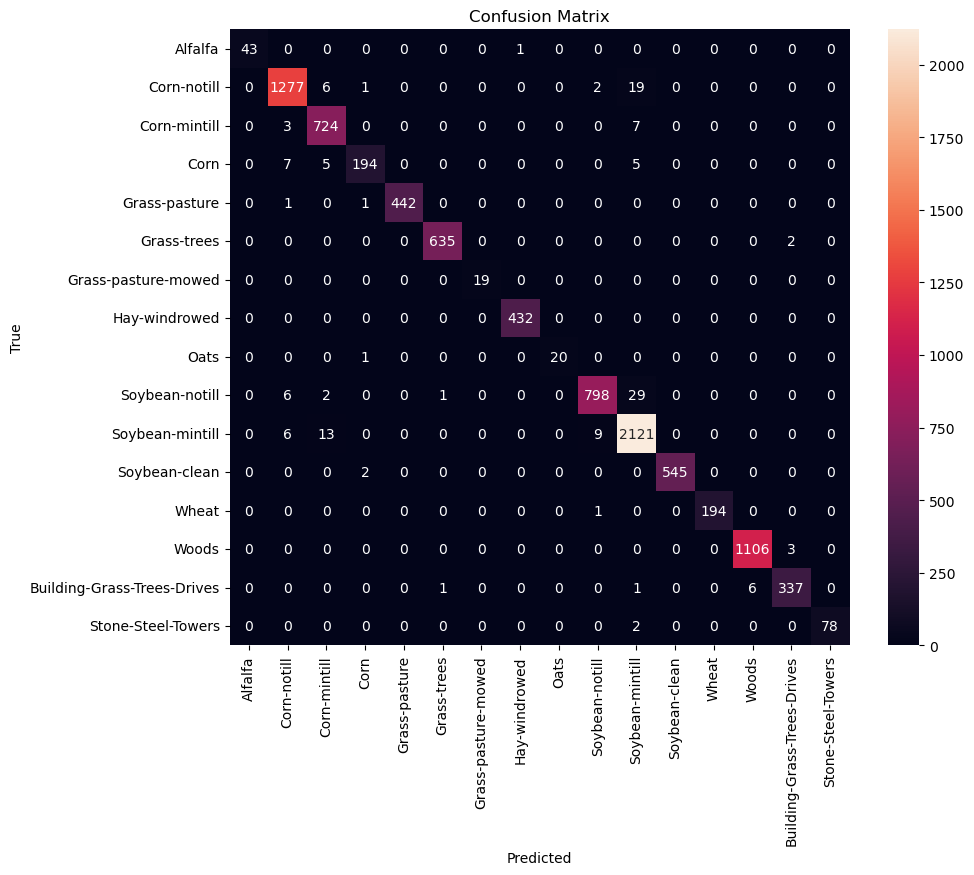

In [237]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

In [238]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [239]:
y_test.value_counts()

11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

In [240]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.98      0.98      0.98      1305
           3       0.97      0.99      0.98       734
           4       0.97      0.92      0.95       211
           5       1.00      1.00      1.00       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      0.95      0.98        21
          10       0.99      0.95      0.97       836
          11       0.97      0.99      0.98      2149
          12       1.00      1.00      1.00       547
          13       1.00      0.99      1.00       195
          14       0.99      1.00      1.00      1109
          15       0.99      0.98      0.98       345
          16       1.00      0.97      0.99        80

    accuracy                           0.98      9108
   macro avg       0.99   

In [241]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.98, Samples = 44
Class 2: Accuracy = 0.98, Samples = 1305
Class 3: Accuracy = 0.99, Samples = 734
Class 4: Accuracy = 0.92, Samples = 211
Class 5: Accuracy = 1.00, Samples = 444
Class 6: Accuracy = 1.00, Samples = 637
Class 7: Accuracy = 1.00, Samples = 19
Class 8: Accuracy = 1.00, Samples = 432
Class 9: Accuracy = 0.95, Samples = 21
Class 10: Accuracy = 0.95, Samples = 836
Class 11: Accuracy = 0.99, Samples = 2149
Class 12: Accuracy = 1.00, Samples = 547
Class 13: Accuracy = 0.99, Samples = 195
Class 14: Accuracy = 1.00, Samples = 1109
Class 15: Accuracy = 0.98, Samples = 345
Class 16: Accuracy = 0.97, Samples = 80
